In [2]:
#warnings
import warnings
warnings.filterwarnings('ignore')

#Basic libraries
import numpy as np
import pandas as pd

#piplines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline

#Models
from sklearn.ensemble import  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

#Scalers and Encoders
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, MinMaxScaler, OneHotEncoder

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_validation  = pd.read_csv('input/test.csv')

In [5]:
data = pd.read_csv('input/train.csv')

In [6]:
data_validation.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [7]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [8]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [9]:
def check_missing(dataset, output_path=None):
    result = pd.concat([dataset.isnull().sum(), dataset.isnull().mean()], axis=1)
    result = result.rename(index=str, columns={0: 'total_missing', 1: 'proportion'})
    if output_path:
        result.to_csv(output_path+"missing_data.csv")
        print(output_path, 'missing_data.csv')
    return result

In [10]:
check_missing(data)

,total_missing,proportion
ID,0,0.0
A1_Score,0,0.0
A2_Score,0,0.0
A3_Score,0,0.0
A4_Score,0,0.0
A5_Score,0,0.0
A6_Score,0,0.0
A7_Score,0,0.0
A8_Score,0,0.0
A9_Score,0,0.0


In [11]:
data.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [12]:
def check_unique(dataset):
    columns = dataset.columns
    for col in columns:
        print(col,dataset[col].unique())

In [13]:
check_unique(data.drop(['ID','age','result'],axis=1))

A1_Score [1 0]
A2_Score [0 1]
A3_Score [1 0]
A4_Score [0 1]
A5_Score [1 0]
A6_Score [0 1]
A7_Score [1 0]
A8_Score [0 1]
A9_Score [1 0]
A10_Score [1 0]
gender ['f' 'm']
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice ['no' 'yes']
austim ['no' 'yes']
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
used_app_bef

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>],
       [<Axes: title={'center': 'A4_Score'}>,
        <Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>],
       [<Axes: title={'center': 'A8_Score'}>,
        <Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'Class/ASD'}>, <Axes: >, <Axes: >]],
      dtype=object)

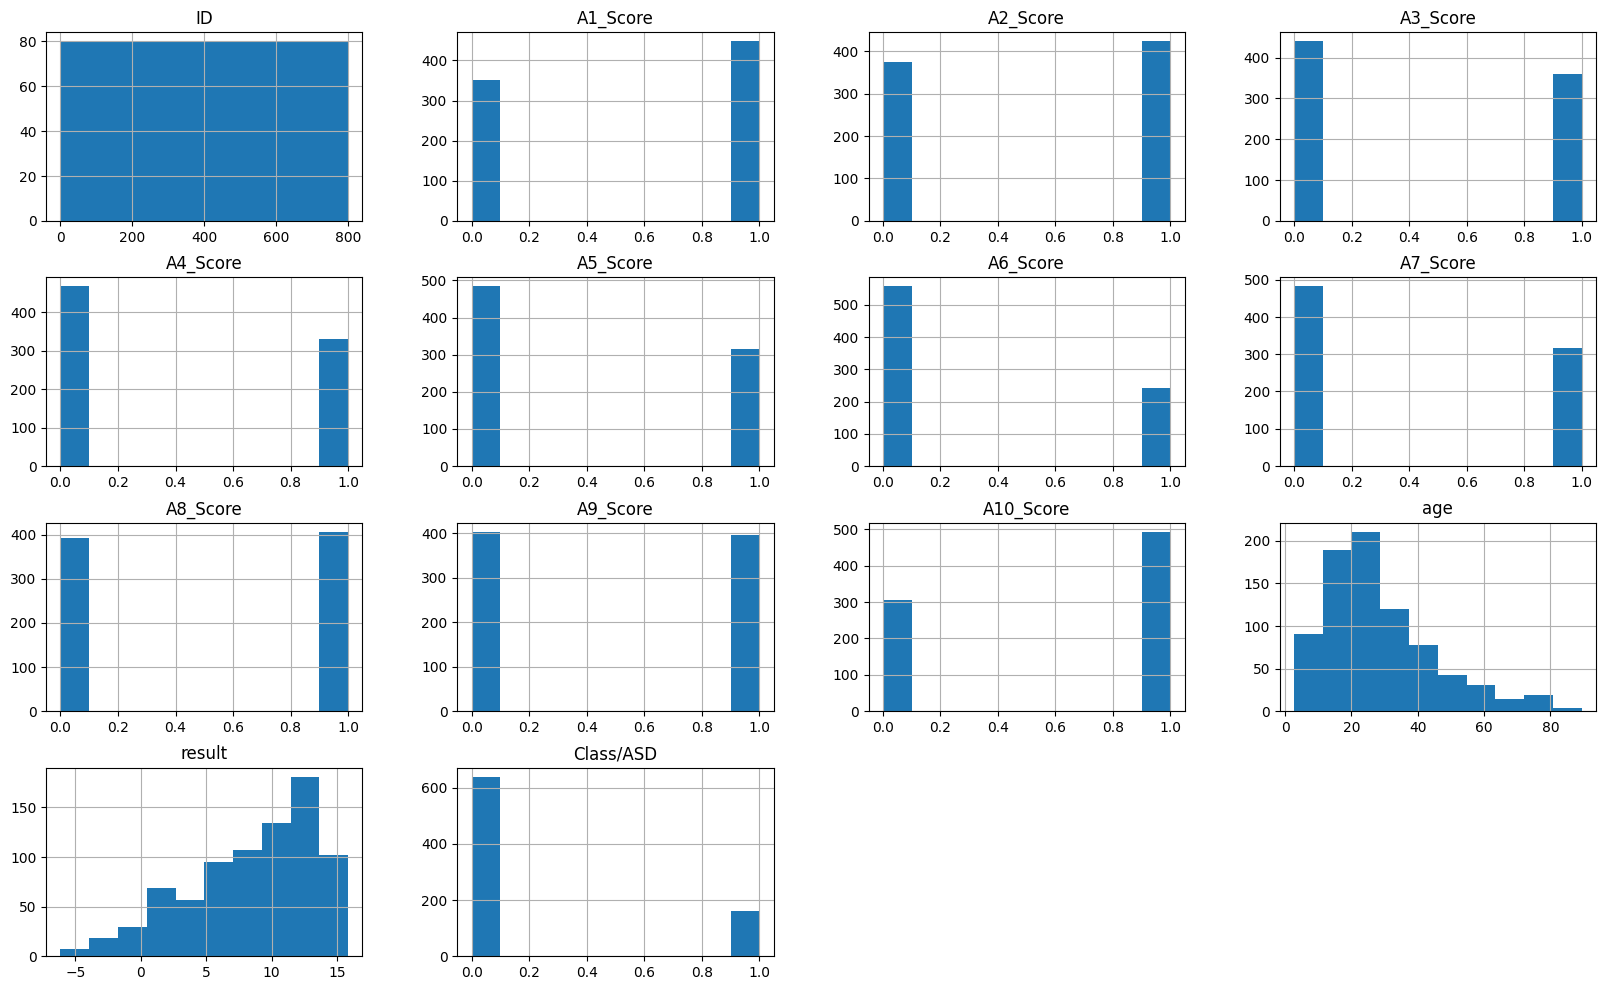

In [14]:
data.hist(figsize=(20,12))

<Axes: >

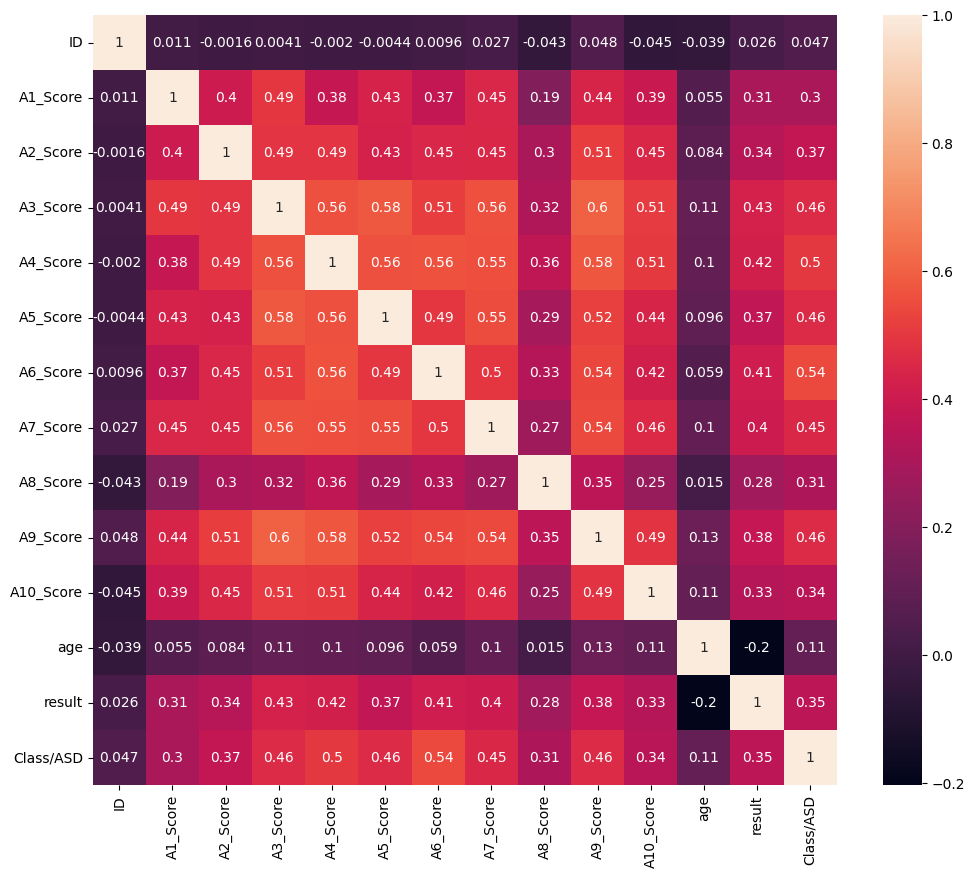

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True),annot=True)

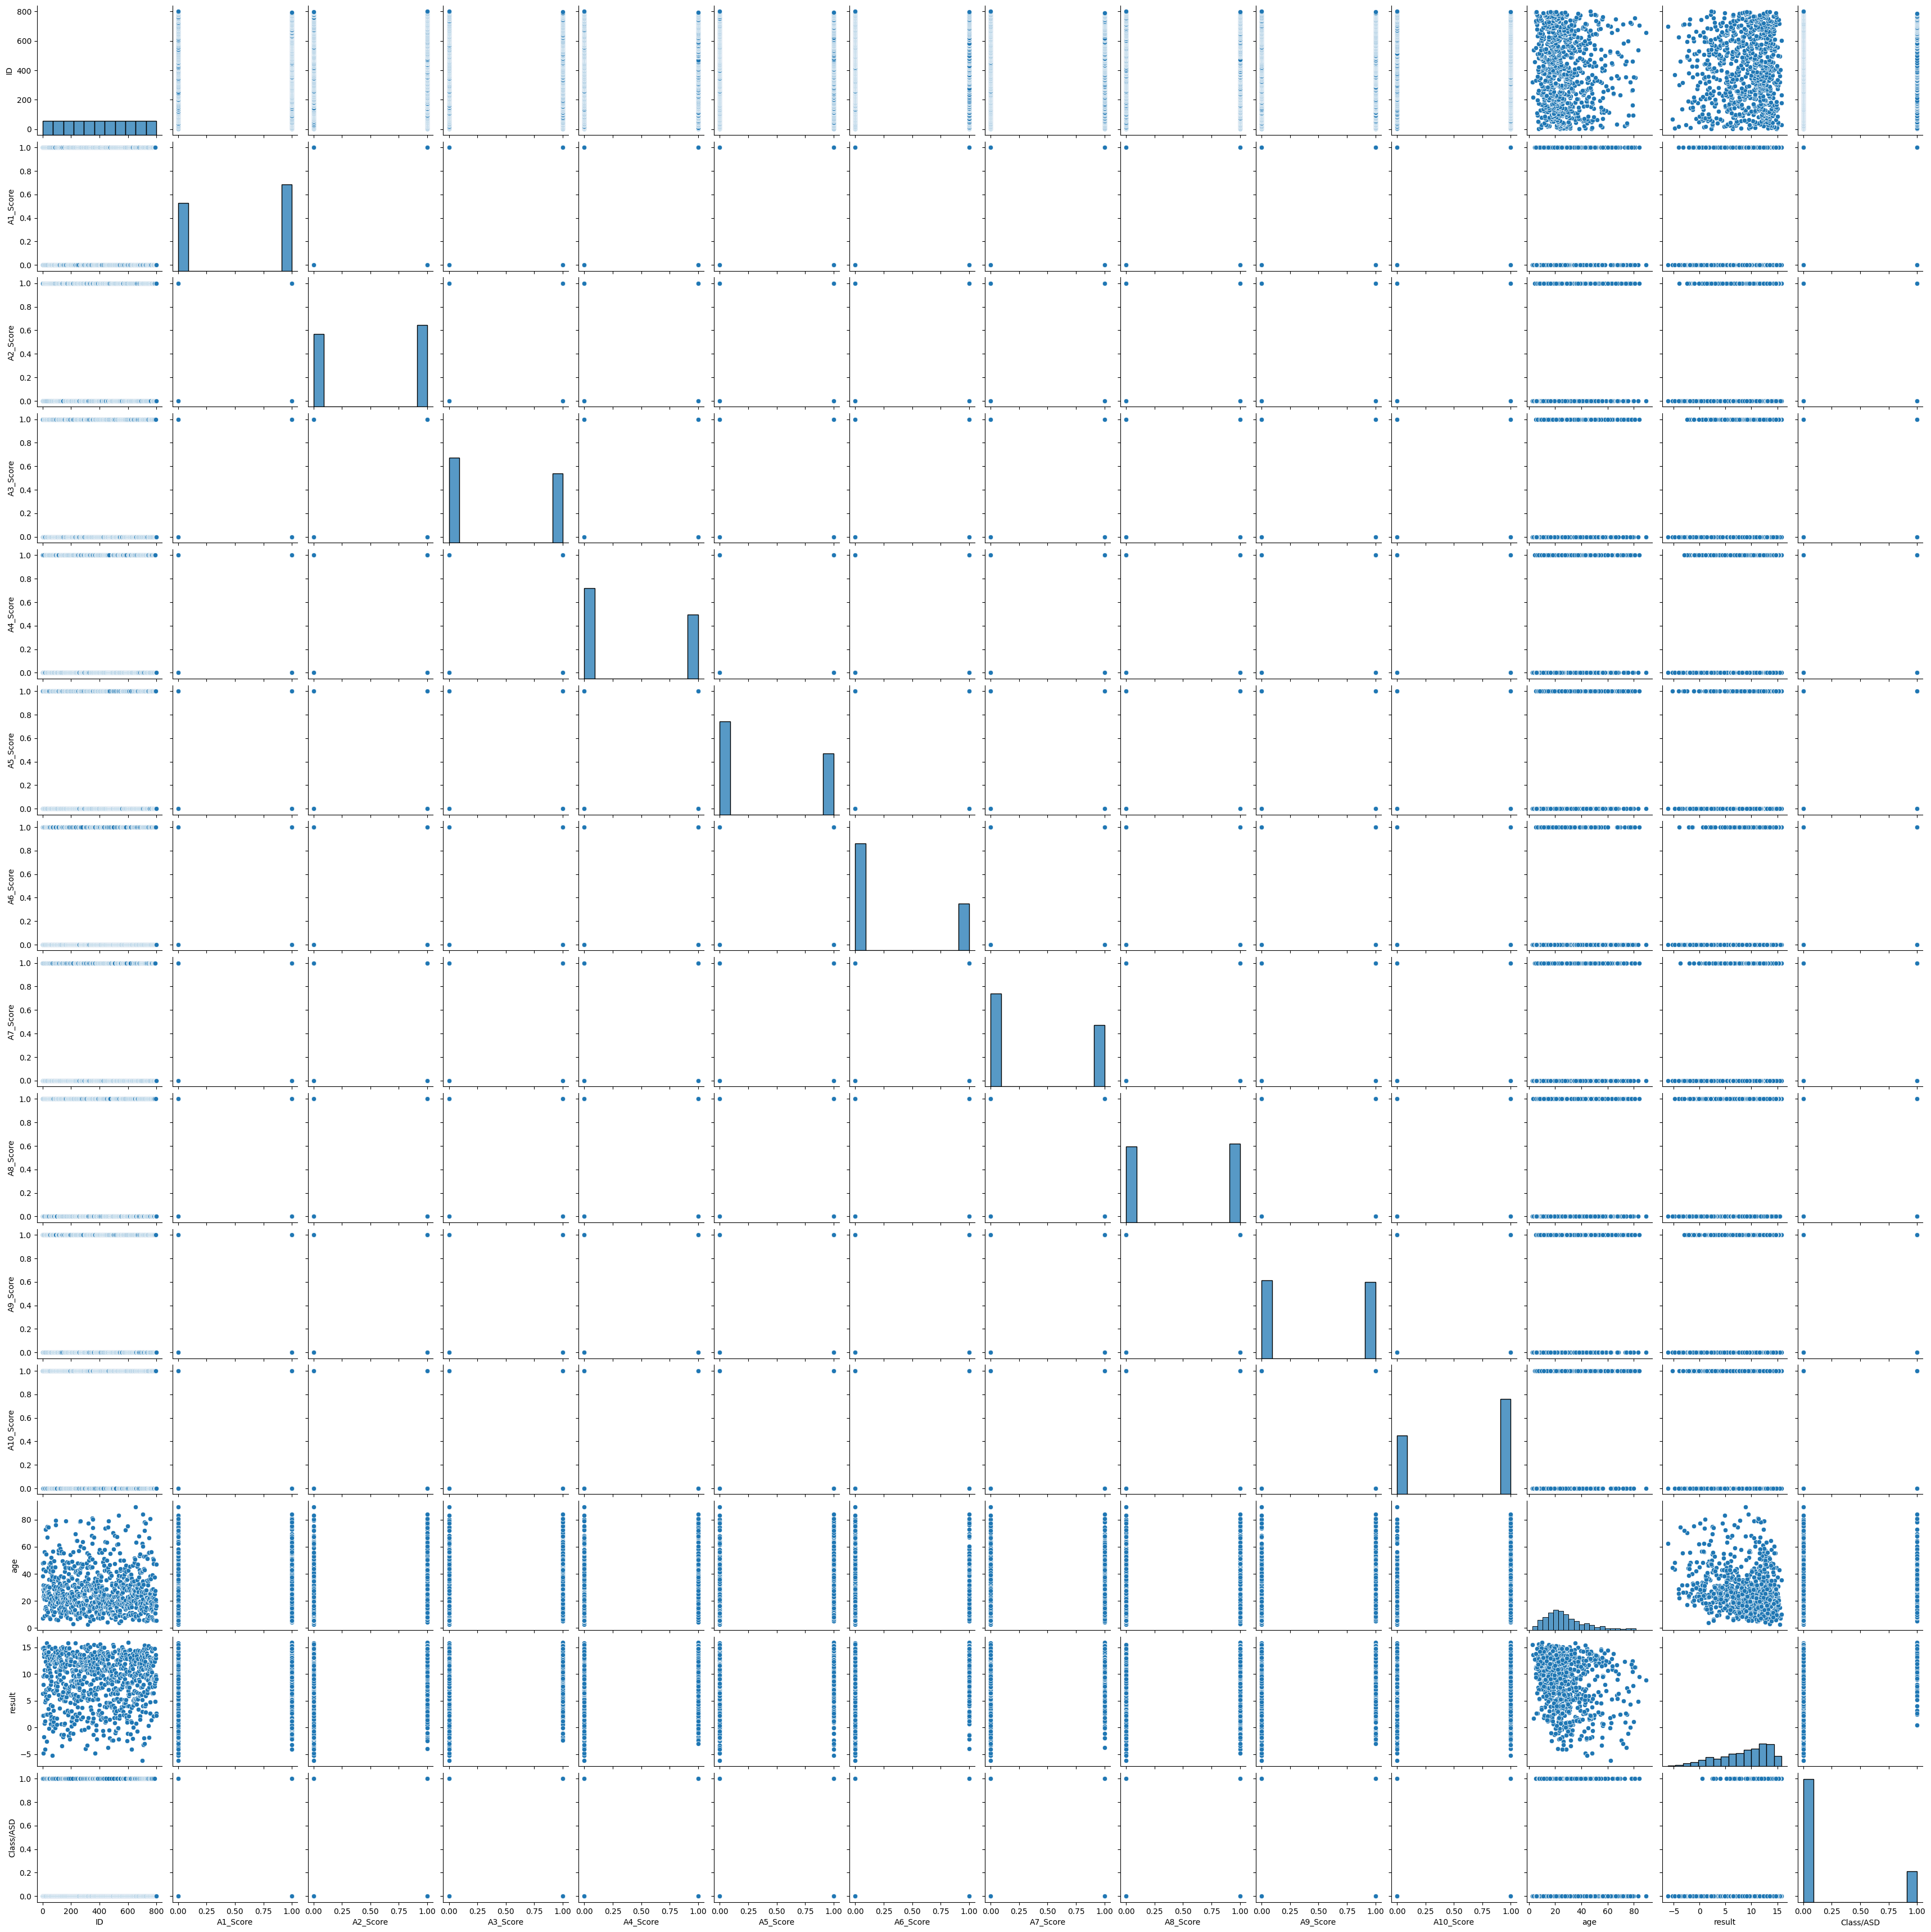

In [15]:
sns.pairplot(data)

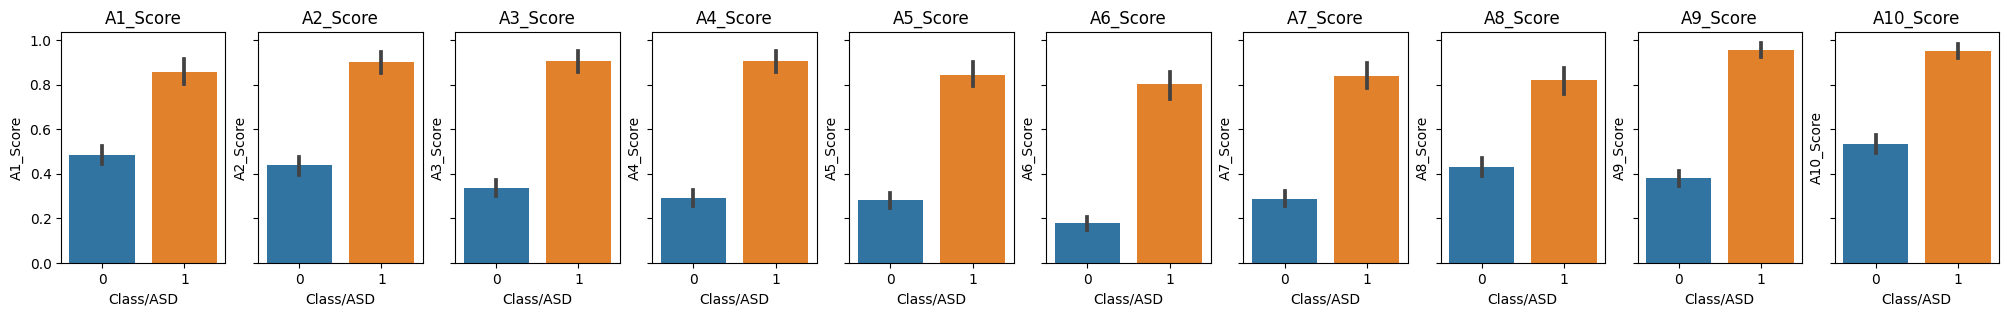

In [30]:

features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score','A8_Score','A9_Score','A10_Score']

# Создайте фигуру и оси
fig, axs = plt.subplots(1, 10, figsize=(25, 3), sharey=True)

# Для каждого признака постройте barplot
for i, feature in enumerate(features):
    sns.barplot(x='Class/ASD', y=feature, data=data, ax=axs[i])
    axs[i].set_title(feature)


plt.show()

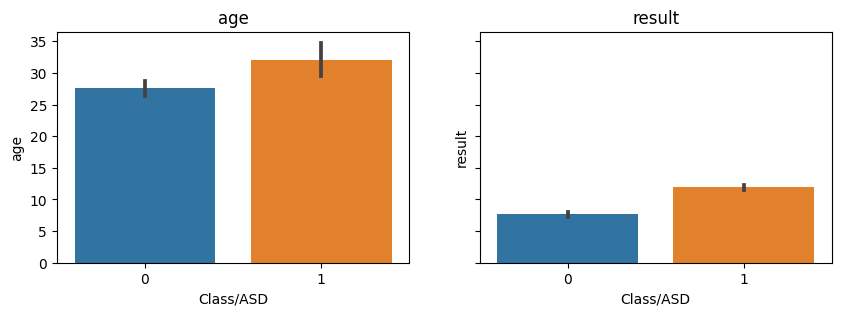

In [32]:

features = ['age', 'result']

# Создайте фигуру и оси
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# Для каждого признака постройте barplot
for i, feature in enumerate(features):
    sns.barplot(x='Class/ASD', y=feature, data=data, ax=axs[i])
    axs[i].set_title(feature)


In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Class/ASD'], axis=1), 
    data['Class/ASD'], 
    test_size=0.25, 
    random_state=42, 
    stratify=data['Class/ASD']
)


In [168]:
X_test,X_val,y_test,y_val = train_test_split(
    X_test,
    y_test,
    test_size=0.25,
    random_state=42,
    stratify=y_test
)

In [143]:
def quality_report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction),
        recall_score(actual, prediction),
        f1_score(actual, prediction)
    ))
    

def plot_roc_curve(actual, prediction):
    fpr, tpr, thresholds = roc_curve(actual, prediction)
    auc_score = roc_auc_score(actual, prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()
    
    
def plot_confuzion_matrix(actual,prediction):
    cm = confusion_matrix(actual, prediction)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [19]:
y_train.value_counts(normalize=True)

Class/ASD
0    0.798333
1    0.201667
Name: proportion, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

Class/ASD
0    0.8
1    0.2
Name: proportion, dtype: float64

In [21]:
y_naive = np.random.choice([0, 1], size=y_test.shape[0], p=y_train.value_counts(normalize=True))

In [22]:
quality_report(y_test, y_naive)

Accuracy: 0.693
Precision: 0.214
Recall: 0.200
f1_score: 0.207


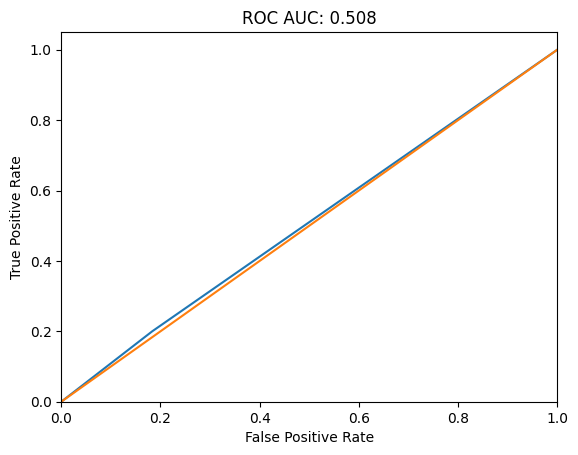

In [23]:
plot_roc_curve(y_test, y_naive)

In [169]:
class NominalFeatures(TransformerMixin,BaseEstimator):
    
    def fit(self, X,y=None):
        return self
    
    def transform(self, X,y=None):
        
        X[['ethnicity','relation','contry_of_res']] = X[['ethnicity','relation','contry_of_res']].replace(
            ['?','others'],'Others')
        X[['ethnicity','relation','contry_of_res']] = X[['ethnicity','relation','contry_of_res']].replace(
            r'[\s\-]', '', regex=True)
        
        country_list = X['contry_of_res'].value_counts()[X['contry_of_res'].value_counts() < 10].index.tolist()
        
        X['contry_of_res'] = X['contry_of_res'].replace(country_list,'Others')
        
        return X[['ethnicity','relation','contry_of_res','gender']]
    
    def fit_transform(self, X,y=None):
        return self.fit(X).transform(X)
    
class NumericalFeatures(TransformerMixin,BaseEstimator):
    
    def fit(self, X,y=None):
        return self
    
    def transform(self, X,y=None):
        
        X['age'] = X['age'].astype('int64')
        
        return X[['age','result']].to_numpy().reshape(-1,2)
    
    def fit_transform(self, X,y=None):
        return self.fit(X).transform(X)

In [170]:
def get_score_cols(dataset):
    return dataset[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']]

def get_nominal_cols(dataset):
    return dataset[['ethnicity','relation','contry_of_res','gender']]

def get_binary_cols(dataset):
    return dataset[['jaundice','austim','used_app_before']]

def get_numerical_cols(dataset):
    return dataset[['age','result']]


In [171]:
vec = make_union(*[
    make_pipeline(FunctionTransformer(get_score_cols,validate=False),MinMaxScaler()),
    make_pipeline(FunctionTransformer(get_nominal_cols,validate=False),NominalFeatures(),OneHotEncoder(sparse=False),MinMaxScaler()),
    make_pipeline(FunctionTransformer(get_binary_cols,validate=False),OrdinalEncoder(),MinMaxScaler()),
    make_pipeline(FunctionTransformer(get_numerical_cols,validate=False),NumericalFeatures(),MinMaxScaler())
])

In [172]:
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
X_val = vec.transform(X_val)
data_validation=vec.transform(data_validation)

In [ ]:
tree_params = {
               'max_depth': list(range(3,30)), 
               'min_samples_leaf': list(range(3,30)), 
               'max_leaf_nodes': list(range(3,30)),
               'splitter': ['best','random'],
               'max_features': ['None','sqrt','log2']
}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                 tree_params, 
                                 verbose=True, n_jobs=-1, cv=5,
                                scoring='roc_auc')

locally_best_tree.fit(X_train,y_train)

In [ ]:
locally_best_tree.best_params_

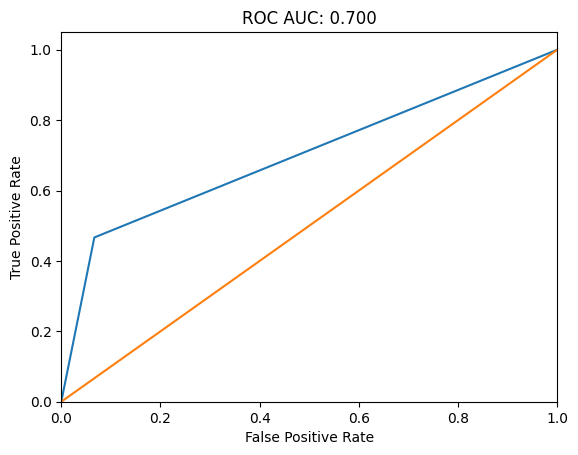

In [1026]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="best",max_depth=10,min_samples_leaf=13, max_leaf_nodes=23, max_features='sqrt'),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train,y_train)

plot_roc_curve(y_test,bag_clf.predict(X_test))

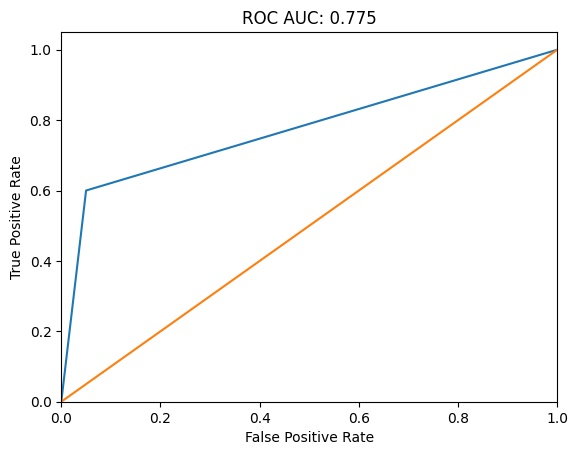

In [1027]:
plot_roc_curve(y_val,bag_clf.predict(X_val))

In [1051]:
def Best_SMOTE():

    list_sm = []
    list_score = []
    
    for _ in range(100):
        
        sm = SMOTE()
        X_res, y_res = sm.fit_resample(X_train, y_train)
    
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(splitter="best",max_depth=10,min_samples_leaf=13, max_leaf_nodes=23, max_features='sqrt'),
            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

        bag_clf.fit(X_res,y_res)
        
        rocauc = roc_auc_score(y_test,bag_clf.predict(X_test)).round(3)
        
        list_score.append(rocauc)
        list_sm.append(sm)
    
    max_index = list_score.index(max(list_score))
    
    return list_sm[max_index]
        

In [1052]:
sm = Best_SMOTE()

In [1053]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [1054]:
bag_clf.fit(X_res,y_res)

quality_report(y_test,bag_clf.predict(X_test))

Accuracy: 0.847
Precision: 0.574
Recall: 0.900
f1_score: 0.701


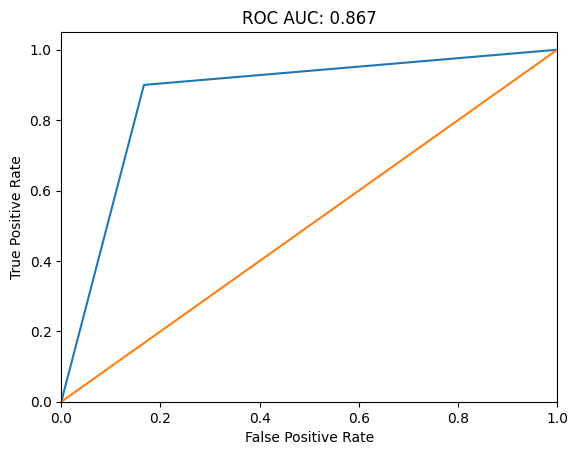

In [1055]:
plot_roc_curve(y_test,bag_clf.predict(X_test))

In [1056]:
quality_report(y_val,bag_clf.predict(X_val))

Accuracy: 0.840
Precision: 0.562
Recall: 0.900
f1_score: 0.692


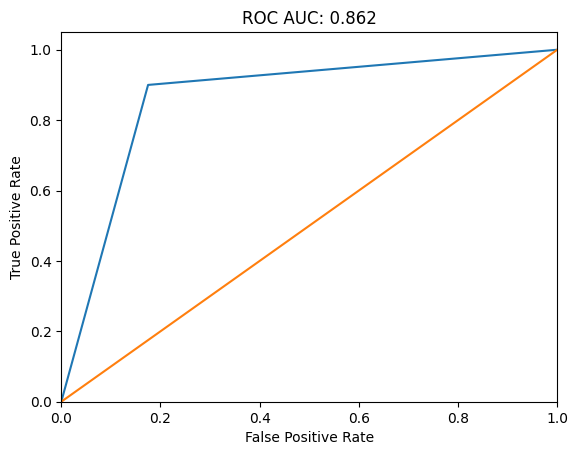

In [1057]:
plot_roc_curve(y_val,bag_clf.predict(X_val))

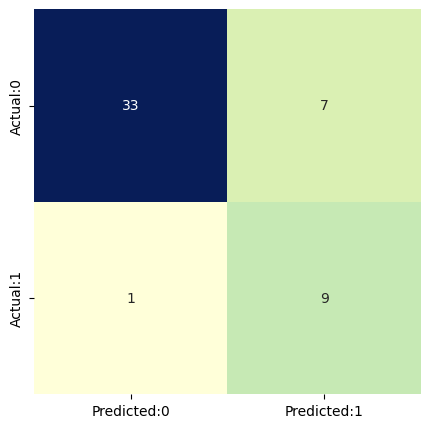

In [1058]:
plot_confuzion_matrix(y_val,bag_clf.predict(X_val))

In [1060]:
y_pred = bag_clf.predict(data_validation)

In [1063]:
result = pd.DataFrame(y_pred)
result.columns = ['Class/ASD']
result.to_csv('result.csv')

In [1067]:
import pickle

filename = 'finalmodel.sav'
pickle.dump(bag_clf, open(filename, 'wb'))

<div align="center"> <font size="5"> <b>Conclusion</b> </div>

<b>

- The task of this dataset is classification. It is necessary to determine whether a person suffers from autism or not. Target variable - Class/ASD.

- This dataset contains 800 observations. The target variable is not evenly distributed and the majority of the features are categorical in nature.

- Based on the correlation matrix, it is evident that the data points are not strongly correlated with one another.

- Prior to training the model, feature selection was performed. Encoding was applied to nominal and binary data, and scaling was applied to numeric data. The ‘Age_desc’ feature was excluded from model.

- Several models with varying parameters were tested, but due to the limited amount of data and its uneven distribution, the results were neither significant nor stable.

- Combining bagging with DecisionTreeClassifier produced the best results on both the test and validation samples.

- To improve the results, we needed to solve the problem of class imbalance. As a result, we decided to use the SMOTE resampling method, which turned out to be the most effective among the methods we considered.

- The final result on the validation sample was based on the recall = 0.9 metric and roc_auc = 0.862 (it is preferable for me to evaluate the work using the recall metric)

</b>